# 2-ConvMP.1Layer.On.Face

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from CHAMP.CHAMP_Layer import CHAMP_Layer
from CHAMP.DataLoader import LoadData
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData, GenerateMask
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayWhere
# inform on the location of your dataset
# datapath = "../../../Science/These/Rapport d'avancement/database/"
import os
home = os.getenv('HOME')
datapath = os.path.join(home, "science/VB_These/Rapport d'avancement/database")

## Loading the Face DataBase

In [2]:
path = os.path.join(datapath, "Face_DataBase")

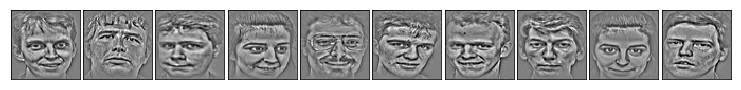

In [3]:
TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))
N_TrSet, _, _, _ = LocalContrastNormalization(TrSet)
Filtered_L_TrSet = FilterInputData(
    N_TrSet, sigma=0.25, style='Custom', start_R=15)
to_display = Filtered_L_TrSet[0][0, 0:10, :, :, :]
DisplayDico(to_display)

## Training the ConvMP_Layer

In [4]:
# MP Parameters
nb_dico = 20
width = 9
dico_size = (width, width)
l0 = 20
seed = 30
# Learning Parameters
eta = .05
nb_epoch = 500

In [5]:
L1 = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                 dico_size=dico_size, verbose=2)
dico = L1.TrainLayer(Filtered_L_TrSet, eta=eta, nb_epoch=nb_epoch, seed=seed)

epoch 1 - 250 done in 8m31s
epoch 250 - 500 done in 7m59s


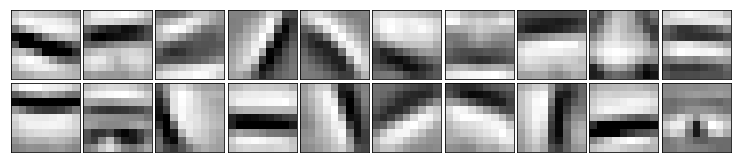

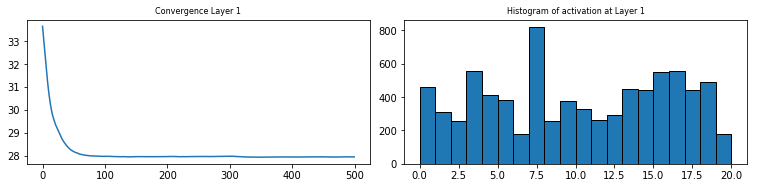

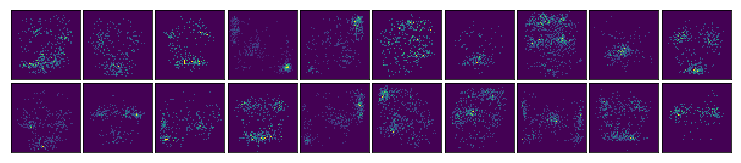

In [6]:
DisplayDico(L1.dictionary)
DisplayConvergenceCHAMP(L1, to_display=['error', 'histo'])
DisplayWhere(L1.where)

## Training the ConvMP Layer with mask for the filters

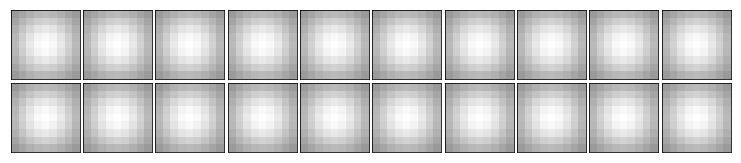

In [7]:
mask = GenerateMask(full_size=(nb_dico, 1, width, width), sigma=0.8, style='Gaussian')
DisplayDico(mask)

In [8]:
L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                      dico_size=dico_size, mask=mask, verbose=2)
dico_mask = L1_mask.TrainLayer(
    Filtered_L_TrSet, eta=eta, nb_epoch=nb_epoch, seed=seed)

epoch 1 - 250 done in 7m45s
epoch 250 - 500 done in 7m39s


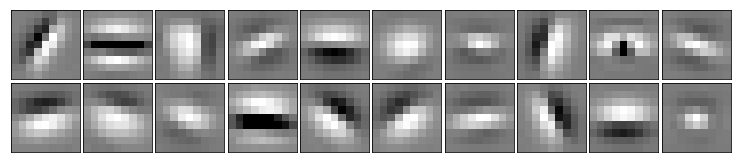

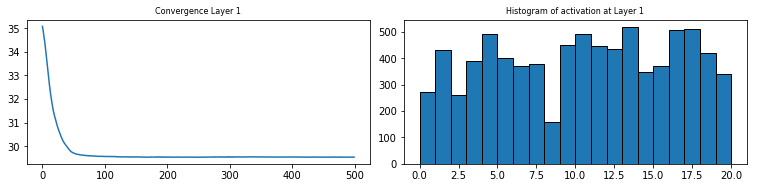

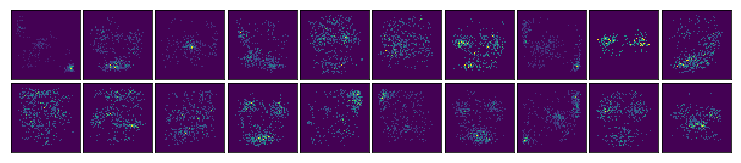

In [9]:
DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error', 'histo'])
DisplayWhere(L1_mask.where)

## Training the ConvMP Layer with homeostasis

In [10]:
# Learning Parameters
eta_homeo = 0.0025

In [11]:
L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                      dico_size=dico_size, mask=mask, verbose=2)
dico_mask = L1_mask.TrainLayer(
    Filtered_L_TrSet, eta=eta, eta_homeo=eta_homeo, nb_epoch=nb_epoch, seed=seed)

activation [ 139.   69.   18.  192.   82. 1570.   78.  786.  152.  208.  168.   41.
  388.  440.  287. 1362. 1282.  223.  340.  175.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [ 138.   88.   24.  201.  115. 1381.   78.  752.  156.  217.  203.   64.
  457.  457.  354. 1214. 1308.  241.  333.  219.]
Modulation [1.00128496 1.00162986 1.00188123 1.00102389 1.0015658  0.99426007
 1.00158551 0.99810266 1.00122092 1.0009451  1.0011421  1.00176786
 1.00005904 0.99980322 1.00055612 0.99527809 0.99566991 1.00087123
 1.00029525 1.00110763]
activation [ 136.   99.   33.  214.  148. 1195.   77.  695.  152.  241.  235.   70.
  561.  487.  443. 1103. 1287.  240.  363.  221.]
Modulation [1.0028223  1.00346124 1.00408945 1.00219093 1.00323826 0.98856732
 1.0034758  0.99604792 1.00265242 1.00201816 1.00229722 1.00374049
 0.99972446 0.99946936 1.00082484 0.99054719 0.99038974 1.0018033
 1.00068785 1.00216869]
activation [ 160.  104.   39.  252.  188.  991.   83. 

activation [412. 406. 413. 390. 403. 359. 420. 410. 439. 387. 380. 412. 409. 397.
 364. 380. 398. 445. 398. 378.]
Modulation [1.04444464 1.06221591 1.03470661 0.96966999 1.00250373 1.0095479
 1.01985867 1.02015788 0.99849884 0.98599434 0.97884901 0.98802883
 1.01310341 0.96789337 0.98996646 0.99359759 0.9555704  1.01951954
 0.95601921 0.99746073]
activation [422. 390. 401. 373. 375. 417. 439. 402. 392. 371. 410. 396. 357. 402.
 399. 385. 390. 447. 399. 433.]
Modulation [1.04272923 1.0612408  1.03289925 0.97098596 1.00211281 1.01483255
 1.01720276 1.01880289 0.99353354 0.98767022 0.98140898 0.98654301
 1.01190477 0.96834389 0.99456101 0.99615889 0.95592351 1.01361859
 0.95637136 1.00027817]
activation [386. 415. 436. 395. 393. 360. 441. 425. 425. 379. 398. 381. 418. 389.
 371. 407. 384. 434. 375. 388.]
Modulation [1.03981459 1.0623835  1.03268917 0.97427395 1.00518063 1.01268447
 1.01231237 1.01850592 0.99452363 0.99121526 0.9802537  0.98705988
 1.01721798 0.96818457 0.99469639 0.998000

activation [410. 411. 394. 394. 382. 419. 378. 395. 376. 403. 415. 424. 393. 406.
 397. 405. 402. 396. 382. 418.]
Modulation [1.0193323  1.02466483 1.00552734 0.99194744 1.00090875 1.00292171
 0.9964994  0.99336929 0.99184737 1.0012687  1.00196447 0.99853186
 1.00369445 0.99193447 1.01374092 1.00464904 0.98565905 0.99126638
 0.99537529 0.98589579]
activation [390. 406. 412. 403. 411. 397. 413. 401. 397. 401. 414. 353. 401. 387.
 407. 395. 408. 393. 416. 395.]
Modulation [1.01684165 1.02190269 1.00696157 0.99339608 1.00523708 0.99835431
 1.00178037 0.99457786 0.99759379 1.00054532 0.99836119 0.99280401
 1.00537177 0.99052805 1.01443602 1.00343329 0.98522192 0.99223962
 0.99969355 0.98168337]
activation [406. 400. 372. 390. 400. 392. 385. 395. 395. 411. 356. 538. 397. 402.
 408. 418. 377. 391. 361. 406.]
Modulation [1.02046402 1.01964388 1.00260615 0.99234088 1.00125357 0.99943657
 0.99710142 0.99423361 0.99867712 1.00018404 0.99334926 1.00975291
 1.00499667 0.9951954  1.01184817 1.00523

activation [409. 411. 405. 394. 399. 416. 393. 390. 407. 405. 402. 401. 398. 406.
 401. 384. 415. 398. 374. 392.]
Modulation [1.01457699 1.02022506 1.0019384  0.99472208 1.00223684 1.00426744
 1.00032493 0.99270091 1.00156937 0.99132991 0.99938952 1.00030635
 1.00416766 0.99620639 1.00670026 0.99770068 0.98914136 0.99917898
 0.99884149 0.98508948]
activation [398. 402. 379. 403. 407. 386. 408. 408. 403. 398. 370. 386. 425. 406.
 388. 434. 364. 398. 439. 398.]
Modulation [1.01126051 1.01614456 1.0001328  0.99688486 1.00259188 0.99849239
 1.00284656 0.99629712 0.99904622 0.98956975 0.99867218 0.99994576
 1.00488003 0.99406767 1.00632134 1.00346624 0.98384451 0.99990026
 1.00823167 0.98796599]
activation [396. 390. 406. 402. 409. 376. 395. 410. 397. 391. 425. 413. 393. 389.
 405. 395. 393. 399. 414. 402.]
Modulation [1.01153076 1.01580397 1.00323732 0.99645131 1.00155005 1.0005616
 1.00165596 0.9951306  0.99860632 0.98988787 1.00310749 1.00201434
 1.00116663 0.99320248 1.00808945 0.998434

activation [398. 417. 379. 400. 401. 386. 420. 404. 380. 396. 400. 389. 421. 394.
 396. 400. 385. 400. 413. 421.]
Modulation [1.0080358  1.0144073  1.00299705 0.99582791 1.00077566 1.00022487
 1.00675544 0.99739424 0.99680421 0.98763534 0.99711526 1.00394389
 1.00048994 0.99637661 1.00583158 0.99706951 0.99000499 0.99880432
 1.00316787 0.99669631]
activation [406. 381. 426. 383. 391. 419. 403. 402. 433. 403. 411. 421. 349. 402.
 411. 398. 418. 400. 373. 370.]
Modulation [1.00856841 1.00965506 1.00877987 0.99583831 1.00049943 1.00407018
 1.00123431 0.99630773 1.00229207 0.9887496  0.99712246 1.00696574
 0.99474598 0.99802576 1.00692041 0.99707682 0.994109   0.9988073
 0.99959152 0.99098354]
activation [399. 398. 414. 403. 409. 398. 373. 403. 397. 405. 386. 397. 401. 402.
 395. 408. 404. 398. 410. 400.]
Modulation [1.00749187 1.0129826  1.00419307 0.99880622 1.00207014 1.00073771
 1.0007074  0.99596941 0.99653328 0.98826026 0.99521816 1.00326635
 1.00364829 0.99768256 1.00497283 0.997432

activation [405. 393. 392. 404. 402. 407. 396. 401. 392. 398. 400. 397. 402. 398.
 410. 391. 403. 409. 408. 392.]
Modulation [1.01159936 1.01009228 1.00451765 0.99667432 1.00123293 1.00294973
 1.00473613 0.99359707 0.9940152  0.98762523 0.99478551 1.00425319
 1.00136828 0.99925856 1.00610479 0.99741263 0.99229124 1.00161439
 1.00037229 0.99585   ]
activation [399. 420. 411. 391. 392. 396. 416. 399. 415. 404. 383. 403. 405. 399.
 383. 433. 394. 391. 358. 408.]
Modulation [1.00866284 1.01414522 1.00914292 0.99439031 1.0000778  0.99890909
 1.00704039 0.99304122 0.99861835 0.98879371 0.99479852 1.0059783
 1.00021266 1.00041151 1.00031461 1.00259994 0.99059825 0.99643461
 0.99577507 1.00045704]
activation [405. 413. 409. 390. 396. 395. 403. 400. 396. 403. 406. 396. 395. 408.
 387. 388. 392. 392. 415. 411.]
Modulation [1.00881705 1.01057778 1.00718549 0.99596668 1.0014742  0.99960906
 1.00421603 0.9932318  0.99601225 0.98813186 0.99776593 1.00543701
 0.99934013 1.00058501 1.0032846  0.996838

activation [407. 396. 395. 407. 408. 395. 403. 397. 422. 404. 388. 405. 391. 376.
 408. 395. 386. 406. 426. 385.]
Modulation [1.01121397 1.00956409 1.00458297 1.00223057 1.00256134 0.99989411
 1.00467953 0.98773378 0.99650558 0.99157789 0.99518046 1.00580409
 0.99966412 0.99621948 1.00680179 0.99823121 0.99142667 1.00317707
 0.99947378 0.9938515 ]
activation [395. 402. 391. 410. 392. 410. 402. 394. 382. 405. 424. 400. 409. 416.
 399. 401. 404. 402. 360. 402.]
Modulation [1.00961984 1.01043452 1.00568417 1.00067292 1.00078075 1.00100189
 1.00400072 0.98842056 0.99167223 0.99072107 0.99784005 1.00467673
 1.0016589  1.00153662 1.00500307 0.9993413  0.9945259  1.00183738
 0.99373818 0.99717298]
activation [394. 399. 407. 389. 407. 398. 399. 403. 402. 400. 365. 393. 398. 402.
 406. 405. 404. 396. 432. 401.]
Modulation [1.01080717 1.00992372 1.00784318 0.99827398 1.00270096 0.99860133
 1.00350919 0.98987286 0.9959837  0.98955671 0.99211789 1.00466501
 0.99949484 0.99769662 1.00523161 0.99910

activation [395. 408. 386. 399. 407. 406. 402. 398. 391. 405. 425. 403. 409. 390.
 387. 392. 410. 396. 395. 396.]
Modulation [1.007443   1.00861479 1.00563465 0.99951651 1.00094157 0.99981489
 1.00494155 0.99445875 0.99323127 0.99498226 0.99910819 1.00263116
 0.9981899  0.99582455 1.00460777 0.99835105 0.9913059  1.00631956
 0.99820185 0.99611814]
activation [391. 390. 408. 392. 399. 396. 404. 397. 411. 399. 390. 398. 376. 409.
 418. 406. 389. 397. 424. 406.]
Modulation [1.00858483 1.00673698 1.00886749 0.99974789 0.99932719 0.99843501
 1.00446648 0.99493064 0.99530861 0.9938499  0.9933756  1.00193222
 0.99612798 0.9981306  1.00760785 1.0001959  0.98904755 1.00723098
 0.99935623 0.99704572]
activation [400. 404. 399. 390. 399. 402. 402. 401. 407. 408. 400. 403. 417. 408.
 393. 404. 394. 400. 369. 400.]
Modulation [1.01074279 1.00913762 1.00691128 1.0016687  0.99956859 0.99939729
 1.00349207 0.99565946 0.99269774 0.99410364 0.99577764 1.00240813
 1.00188841 0.99598295 1.00324803 0.99875

activation [405. 405. 383. 402. 404. 418. 408. 399. 399. 393. 400. 403. 402. 408.
 399. 409. 395. 398. 368. 402.]
Modulation [1.01243716 1.00990374 1.00554312 1.00142804 0.99921267 0.99848302
 1.00067977 0.9946022  0.99419156 0.99163872 0.99637763 1.00439507
 0.99785653 0.9968042  1.00311671 1.00312589 0.99160087 1.00633658
 0.99575138 0.9968282 ]
activation [403. 410. 423. 401. 389. 364. 393. 398. 411. 404. 382. 395. 401. 374.
 391. 386. 409. 396. 466. 404.]
Modulation [1.01078831 1.00826533 1.01101083 1.00078415 0.99793724 0.99275557
 0.99812118 0.99493379 0.99452404 0.99388198 0.99638667 1.00342091
 0.99722385 0.99426516 1.00342976 1.00023501 0.99320867 1.00696455
 1.00600464 0.99619873]
activation [396. 396. 427. 397. 391. 379. 386. 404. 408. 408. 396. 389. 400. 394.
 395. 400. 402. 395. 432. 405.]
Modulation [1.01049676 1.00736559 1.00895711 1.00069491 0.99890029 0.99589571
 0.99873544 0.99511999 0.99358398 0.99355054 0.9979612  1.00385002
 0.9971438  0.99653674 1.00420913 1.00145

activation [391. 383. 416. 417. 388. 386. 397. 405. 404. 395. 390. 390. 401. 402.
 405. 395. 394. 395. 433. 413.]
Modulation [1.00950468 1.00731362 1.0078813  1.0021748  0.99868504 0.99666973
 0.99790827 0.99690855 0.99512892 0.98846414 0.9972523  1.00438314
 0.99751867 0.99581885 1.00623309 0.99894518 0.99232927 1.00983752
 0.99870264 0.9986619 ]
activation [405. 419. 393. 395. 402. 408. 397. 410. 394. 397. 411. 425. 392. 399.
 396. 407. 404. 403. 360. 383.]
Modulation [1.01106688 1.01028679 1.00505249 0.99920188 1.00078103 0.99911504
 0.99843585 0.99604714 0.99444695 0.98935535 0.99900028 1.00612569
 0.99735087 0.99548192 1.00534023 0.99981947 0.99338754 1.01069394
 0.99297339 0.99640314]
activation [397. 383. 398. 398. 407. 393. 397. 399. 404. 399. 391. 376. 402. 405.
 396. 390. 405. 408. 434. 418.]
Modulation [1.00987573 1.00585079 1.00666107 1.00035491 1.0003183  0.9972785
 0.99912969 0.99376614 0.99583564 0.99006549 0.99647566 1.00033533
 0.99919638 0.99572244 1.00625321 0.998209

activation [402. 392. 411. 372. 403. 370. 413. 405. 393. 400. 375. 417. 408. 398.
 409. 408. 440. 393. 407. 384.]
Modulation [1.01162459 1.00530258 1.01021445 0.99606255 0.9997161  0.99169005
 1.0017519  1.00162044 0.99152356 0.99297801 0.99434622 1.00409474
 0.99950829 0.99627704 1.00893548 0.99846043 0.99608891 1.00998195
 0.99678196 0.99343622]
activation [397. 399. 414. 395. 397. 386. 401. 409. 394. 399. 410. 403. 407. 402.
 407. 399. 412. 393. 388. 388.]
Modulation [1.01130424 1.00644734 1.00859089 1.00009417 0.99928529 0.99600155
 0.99987515 1.00089593 0.99254403 0.99299551 0.99794426 1.001631
 0.99835945 0.99657313 1.00760713 0.99731541 0.99038114 1.0109748
 0.99578635 0.99574272]
activation [411. 407. 383. 418. 399. 443. 399. 392. 413. 407. 365. 382. 392. 395.
 389. 395. 349. 404. 440. 417.]
Modulation [1.01252403 1.00684508 1.00278021 1.00215213 1.00052048 1.00176156
 0.99946442 0.99719664 0.99501433 0.99342134 0.99385449 1.00039214
 0.99549416 0.99576247 1.00469214 0.99773228

activation [415. 391. 416. 390. 421. 396. 396. 397. 415. 395. 444. 407. 391. 407.
 402. 365. 393. 408. 373. 378.]
Modulation [1.01747744 1.00408913 1.01161023 1.00111848 1.00215846 0.99597231
 0.99780768 0.99604316 0.99347518 0.98996862 1.00151071 1.00478272
 0.99732834 0.99482198 1.00779669 0.99143835 0.98988399 1.01562638
 0.99341955 0.99429725]
activation [403. 408. 422. 393. 410. 391. 395. 391. 399. 391. 400. 411. 405. 405.
 403. 376. 393. 417. 401. 386.]
Modulation [1.01543869 1.00526185 1.00946575 1.00242629 0.99940352 0.99650371
 0.99833546 0.99644405 0.99154369 0.99064138 0.99575836 1.00385098
 0.99851002 0.99392424 1.00751347 0.99600997 0.99081613 1.01452462
 0.99695135 0.99717745]
activation [398. 393. 398. 402. 394. 422. 394. 403. 405. 408. 374. 396. 396. 394.
 402. 431. 399. 398. 382. 411.]
Modulation [1.01460305 1.00314661 1.00364785 1.00425793 0.99679341 0.9988619
 0.99964659 0.99880225 0.99182422 0.99300035 0.99576894 1.0009562
 0.99720825 0.99263987 1.00670407 1.0022943

activation [409. 402. 388. 407. 405. 401. 410. 394. 396. 406. 356. 413. 411. 400.
 387. 414. 385. 405. 411. 400.]
Modulation [1.01503834 1.00352793 1.00545625 1.00387623 0.99932926 0.99674008
 1.00297576 0.9968027  0.99260565 0.99079958 0.99376048 1.00571068
 0.99914745 0.99181871 1.00539954 0.99825239 0.98950877 1.01021543
 0.998457   1.00099821]
activation [403. 383. 429. 389. 387. 384. 393. 401. 415. 399. 536. 365. 365. 385.
 404. 354. 434. 398. 366. 410.]
Modulation [1.01125131 1.00269418 1.0104158  1.00098131 0.99727854 0.99633846
 0.99885281 0.9992729  0.99425798 0.98838108 1.01191879 1.00033497
 0.9946407  0.99183908 1.01077447 0.99252684 0.99565681 1.00811507
 0.99395508 1.00099571]
activation [394. 394. 425. 384. 380. 389. 390. 412. 417. 397. 519. 367. 373. 393.
 410. 354. 425. 394. 373. 410.]
Modulation [1.01109462 1.00340919 1.00915015 1.00144502 0.99783424 0.99702258
 0.99915167 0.99923242 0.99364123 0.98845179 1.00608065 1.00181716
 0.99612868 0.99248934 1.01057628 0.99447

activation [399. 397. 396. 418. 407. 404. 400. 407. 387. 398. 398. 391. 389. 407.
 398. 430. 380. 399. 384. 411.]
Modulation [1.01274949 1.0021827  1.00744124 1.00650508 1.00159907 0.99554341
 0.99863351 1.00031301 0.98790165 0.99215097 0.99720574 1.00313288
 0.99469792 0.99326754 1.00763989 0.99946014 0.99090781 1.01268689
 0.99526527 1.0011725 ]
activation [403. 390. 395. 398. 413. 399. 405. 399. 382. 405. 397. 402. 393. 396.
 401. 388. 400. 400. 427. 407.]
Modulation [1.01291176 1.00275431 1.00819609 1.00301848 1.00025066 0.9947907
 0.99863692 0.99896954 0.99039915 0.99255135 0.99759548 1.00485887
 0.9968129  0.99195106 1.00800748 0.99372465 0.99474058 1.0128493
 0.99833739 0.99905862]
activation [402. 401. 407. 394. 390. 399. 397. 402. 410. 401. 413. 404. 403. 392.
 398. 400. 415. 403. 376. 393.]
Modulation [1.01223163 1.00488757 1.00925082 1.0034387  0.99748154 0.99501581
 0.99757633 0.99918512 0.99423123 0.99151238 0.99823976 1.00441831
 0.99830964 0.99281742 1.0077725  0.9962859

activation [398. 393. 401. 398. 384. 408. 397. 412. 397. 394. 407. 393. 397. 393.
 403. 399. 405. 411. 409. 401.]
Modulation [1.01046495 1.00392322 1.00961048 1.0022541  0.99849112 0.99854195
 1.00121299 0.99902033 0.99163012 0.9912331  0.99426179 1.00194498
 0.99717567 0.99339592 1.00860808 0.99645797 0.99234233 1.01352809
 0.99564882 1.00065908]
activation [397. 411. 398. 406. 437. 394. 411. 394. 391. 422. 344. 431. 425. 395.
 399. 418. 375. 394. 371. 387.]
Modulation [1.01140854 1.00729014 1.00910215 1.00321049 1.00618811 0.99472088
 1.00265185 0.99328846 0.99307909 0.99411209 0.99094298 1.00531022
 0.99861881 0.9967538  1.00713604 0.99694494 0.98998405 1.00816017
 0.99137033 1.00017752]
activation [401. 407. 409. 401. 403. 389. 398. 382. 409. 408. 414. 389. 408. 411.
 400. 382. 388. 398. 390. 413.]
Modulation [1.01185202 1.00554949 1.00939332 1.00226642 1.00039723 0.99566304
 1.00093078 0.99423285 0.99448786 0.99072993 0.99963701 1.00046005
 0.99474567 0.99753758 1.00727483 0.99416

activation [401. 392. 408. 395. 396. 404. 399. 401. 405. 403. 403. 397. 403. 404.
 383. 391. 401. 399. 408. 407.]
Modulation [1.01329668 1.00379932 1.00954793 1.00284768 0.99951492 0.9965353
 1.00004147 0.99858237 0.99355532 0.99005222 0.9965875  0.99985575
 0.99673895 0.99482064 1.00403062 0.99685053 0.99414101 1.01127472
 0.99707919 1.00119285]
activation [406. 430. 375. 410. 409. 402. 397. 400. 387. 381. 385. 402. 388. 387.
 446. 469. 383. 402. 366. 375.]
Modulation [1.01253438 1.00958474 1.00372935 1.00645506 1.00239711 0.99367979
 1.00076121 0.99786763 0.99000314 0.98794202 0.99444701 1.0020168
 0.99459776 0.99197431 1.01637762 1.00333501 0.99344052 1.01197429
 0.99136328 0.99615965]
activation [401. 426. 374. 414. 415. 395. 394. 405. 383. 377. 378. 395. 395. 387.
 437. 456. 396. 403. 382. 387.]
Modulation [1.01199615 1.00703709 1.00581563 1.00559958 1.00163876 0.99352975
 1.00100981 0.99787295 0.99110233 0.98953927 0.99570611 1.00184458
 0.99560746 0.99307075 1.01244348 0.9975676

activation [398. 401. 407. 397. 405. 391. 393. 403. 406. 401. 426. 389. 407. 400.
 391. 398. 407. 397. 393. 390.]
Modulation [1.01136645 1.00501382 1.00806402 1.00201445 1.00010634 0.99683509
 0.99987428 0.99759786 0.99485479 0.9912049  1.00075718 1.00227926
 0.99721848 0.99499334 1.00521916 0.99527395 0.99435314 1.01063416
 0.99375544 0.99889146]
activation [398. 404. 379. 396. 392. 418. 398. 397. 411. 399. 406. 397. 410. 406.
 400. 392. 397. 399. 401. 400.]
Modulation [1.0117858  1.00477877 1.00648271 1.00267518 0.99899955 0.9988313
 1.00142542 0.99694147 0.9935469  0.99100735 0.99501102 1.00471749
 0.9956811  0.99500583 1.00721107 0.99572656 0.99282733 1.01127891
 0.99531236 1.00110825]
activation [396. 409. 408. 398. 412. 384. 399. 397. 393. 401. 362. 423. 391. 395.
 401. 422. 405. 401. 403. 400.]
Modulation [1.01240349 1.0034823  1.0132485  1.00395193 1.0015612  0.99310099
 1.00206257 0.99790604 0.99007393 0.99134672 0.99311602 1.00567006
 0.9925127  0.99311085 1.00719297 0.998288

activation [392. 393. 407. 399. 400. 388. 408. 405. 407. 406. 417. 401. 402. 390.
 396. 376. 410. 402. 403. 398.]
Modulation [1.01024875 1.00221466 1.01094352 1.00345184 0.9994719  0.99691829
 1.00220117 0.99732653 0.99370323 0.99205168 0.9951419  1.00226603
 0.99694097 0.99283368 1.00702993 0.99712086 0.99441116 1.01048419
 0.99603356 0.9995406 ]
activation [396. 405. 383. 398. 398. 430. 394. 395. 384. 393. 334. 403. 404. 419.
 402. 491. 374. 404. 394. 399.]
Modulation [1.01296332 1.00458748 1.00852267 1.00378304 0.99947322 1.00098512
 0.99948447 0.99564607 0.99136629 0.99005793 0.9894419  1.00192103
 0.99627367 0.99621918 1.00837718 1.0052645  0.99106351 1.00977377
 0.99503214 1.0002189 ]
activation [406. 401. 395. 400. 395. 430. 394. 385. 394. 397. 344. 388. 398. 412.
 399. 477. 382. 401. 396. 406.]
Modulation [1.01318704 1.0042583  1.00958638 1.00390056 0.999601   0.99908486
 0.99986518 0.9959719  0.9923917  0.99052117 0.99360784 1.00172611
 0.99603091 0.99503196 1.00822859 0.99948

activation [398. 400. 399. 401. 412. 400. 402. 406. 400. 400. 385. 375. 390. 391.
 417. 415. 391. 398. 414. 406.]
Modulation [1.00987653 1.00536339 1.00787783 1.00166532 1.00353919 0.99588196
 1.00355128 0.99660037 0.99260319 0.99236029 0.99372201 0.9978956
 0.9951894  0.99368614 1.01068504 0.99908376 0.99296982 1.01011762
 0.99582445 1.00188241]
activation [407. 404. 394. 394. 388. 396. 415. 397. 392. 406. 418. 402. 412. 410.
 391. 390. 418. 403. 370. 393.]
Modulation [1.01053585 1.00534995 1.00819939 1.00132203 0.99946087 0.99589223
 1.00286299 0.9945861  0.99262161 0.99237932 0.99879792 1.00638433
 0.99857702 0.99673484 1.00485709 0.99402432 0.99601812 1.0107765
 0.99112517 0.99984426]
activation [391. 402. 398. 409. 403. 401. 392. 401. 398. 399. 368. 432. 404. 393.
 400. 397. 372. 405. 441. 394.]
Modulation [1.00824976 1.00405132 1.01011518 1.00324192 1.00330517 0.99717727
 0.99805659 0.99555429 0.99518284 0.99049589 0.99306788 1.00572485
 0.99475572 0.99356046 1.00774126 0.9972232

activation [396. 389. 405. 418. 378. 410. 398. 403. 395. 399. 386. 399. 397. 403.
 400. 414. 402. 406. 399. 403.]
Modulation [1.01104346 1.00260972 1.01043024 1.00331407 1.00056607 0.9964201
 1.00140196 0.99565425 0.99247862 0.99137105 0.99626394 1.00324079
 0.99712299 0.99522115 1.00822286 0.99559    0.99244517 1.01071227
 0.99467468 1.00159531]
activation [411. 403. 409. 386. 427. 381. 403. 400. 399. 402. 437. 390. 408. 390.
 401. 364. 387. 399. 400. 403.]
Modulation [1.01230983 1.00613639 1.00878967 0.99754687 1.00762912 0.99324751
 1.00203916 0.9947103  0.99408564 0.99170963 1.00074382 1.00355356
 0.99808729 0.99427869 1.00820222 0.99115341 0.99182941 1.00874788
 0.99500612 1.00063084]
activation [401. 412. 394. 384. 425. 396. 404. 397. 402. 403. 401. 415. 415. 404.
 402. 387. 382. 398. 387. 391.]
Modulation [1.01054796 1.00565151 1.00735609 0.99972816 1.00338623 0.99620479
 1.00156647 0.99472349 0.99425506 0.99142173 0.99499778 1.00510719
 0.99685057 0.99584107 1.00802479 0.996742

activation [401. 388. 407. 412. 394. 409. 409. 390. 383. 395. 413. 374. 405. 448.
 405. 372. 392. 397. 405. 401.]
Modulation [1.01168588 1.00255804 1.01002972 1.00362505 1.0015734  0.9966204
 1.0036013  0.99400368 0.99137226 0.98956149 0.99769793 1.00056006
 0.99701593 1.00222058 1.00732933 0.99261675 0.99269701 1.01012249
 0.99538518 1.00012705]
activation [408. 395. 400. 403. 408. 403. 415. 393. 387. 393. 403. 396. 411. 428.
 398. 386. 389. 398. 395. 391.]
Modulation [1.01153518 1.00399547 1.009157   1.00217269 1.00229041 0.99555372
 1.00250965 0.99521143 0.993417   0.99018102 0.99614943 1.00368335
 0.99642571 0.99646239 1.00670711 0.99597395 0.99366808 1.01046054
 0.9948     1.00000679]
activation [401. 410. 395. 385. 401. 391. 401. 401. 430. 394. 393. 404. 397. 370.
 395. 418. 406. 405. 400. 403.]
Modulation [1.00984392 1.00501802 1.009134   1.00154934 1.00063757 0.99495097
 0.99941659 0.99665665 0.99609205 0.99163149 0.99554483 1.00449984
 0.99418377 0.99075154 1.0071043  0.998854

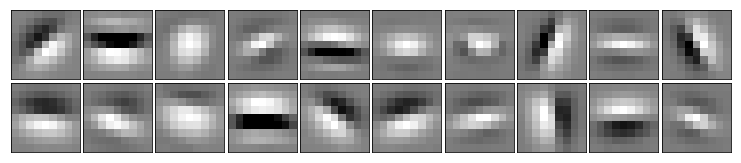

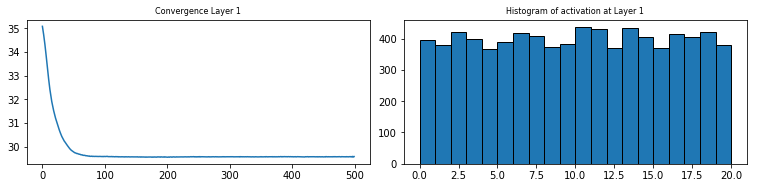

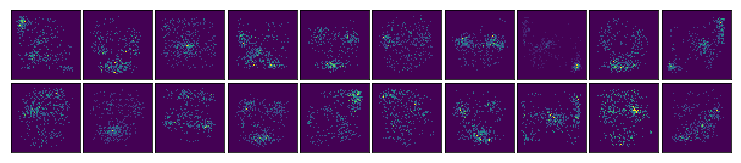

In [12]:
DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error', 'histo'])
DisplayWhere(L1_mask.where)